In [1]:
pip install pandas matplotlib seaborn geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
# Load the CSV file
data = pd.read_csv('/Dataset .csv')


In [6]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Level 1 Tasks:

1. Top Cuisines:

In [7]:
# Count the frequency of each cuisine
cuisine_counts = data['Cuisines'].value_counts().nlargest(3)
cuisine_percentages = (cuisine_counts / len(data)) * 100
print("Top 3 Cuisines:\n", cuisine_counts)
print("Percentages:\n", cuisine_percentages)


Top 3 Cuisines:
 Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64
Percentages:
 Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


2. City Analysis:

In [15]:
# City with the highest number of restaurants
city_counts = data['City'].value_counts()
top_city = city_counts.idxmax()
print(f"City with the highest number of restaurants: {top_city}")

# Average ratings per city
average_ratings = data.groupby('City')['Aggregate rating'].mean()
print("Average ratings per city:\n", average_ratings)

# City with the highest average rating
top_rated_city = average_ratings.idxmax()
print(f"City with the highest average rating: {top_rated_city}")


City with the highest number of restaurants: New Delhi
Average ratings per city:
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64
City with the highest average rating: Inner City


3. Price Range Distribution:

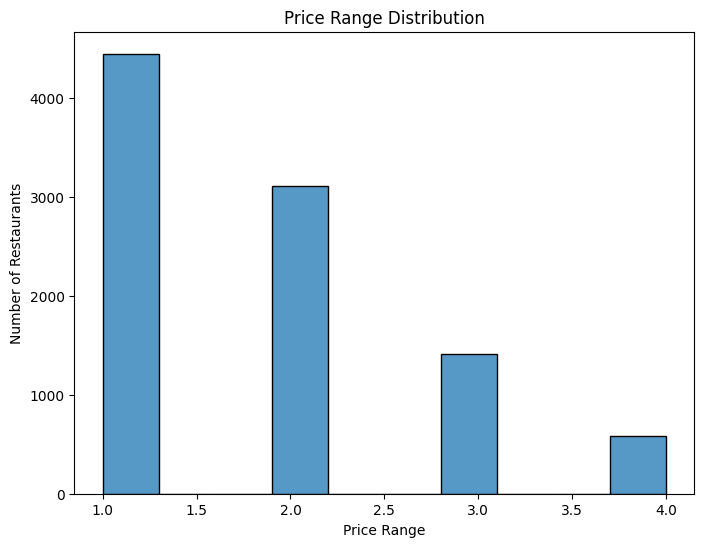

Price Range Percentage:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [12]:
# Create a histogram of price ranges
plt.figure(figsize=(8,6))
sns.histplot(data['Price range'], kde=False, bins=10)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

# Calculate percentage in each price range
price_percentage = data['Price range'].value_counts(normalize=True) * 100
print("Price Range Percentage:\n", price_percentage)


4. Online Delivery:

In [13]:
# Percentage of restaurants with online delivery
online_delivery_percentage = data['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of restaurants offering online delivery:\n", online_delivery_percentage)

# Compare average ratings for restaurants with and without online delivery
average_ratings_online = data.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Average ratings based on online delivery:\n", average_ratings_online)


Percentage of restaurants offering online delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64
Average ratings based on online delivery:
 Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
